<a href="https://colab.research.google.com/github/SproutCoder/curriculum/blob/master/Schneidemaschine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Entscheidungsbaum: Vorausschauende Wartung einer Schneidemaschine

Dieses Jupyter-Notizbuch wurde entwickelt, um vorherzusagen, ob eine Schneidemaschine während des Schneidevorgangs wahrscheinlich kaputt geht. Diese Informationen können genutzt werden, um vorbeugende Wartungsarbeiten an der Maschine durchzuführen, wie z. B. den Austausch abgenutzter oder beschädigter Klingen, bevor es zu einem Ausfall kommt, wodurch die Gesamteffizienz der Anlage verbessert und Ausfallzeiten reduziert werden.


### Prozessschritte Modellentwicklung
1. Daten einlesen
2. Daten erkunden 
3. Daten vorbereiten
4. Modelle bilden
5. Modelle validieren
6. Modell testen

## 0. Bibliotheken importieren

Bibliotheken stellt vorgefertigten Code bereit, mit dem Ihr bestimmte Aufgaben einfacher und schneller erledigen könnt. Für Maschine Learning Projekte gibt es viele Bibliotheken in Python, wie NumPy, Pandas, Scikit-learn, TensorFlow und Keras. Diese Bibliotheken bieten viele nützliche Funktionen und Werkzeuge für das maschinelle Lernen, wie z. B. die Aufbereitung von Daten, die Visualisierung von Daten, und die Auswertung von Modellen.

Das Verwendend dieser Bibliotheken kann Euch viel Zeit und Mühe sparen, da Ihr nicht alles von Grund auf neu schreiben müsst. Ihr könnte die Bibliothek einfach importieren und ihre vorgesfertigten Funktionen verwenden, um das benötigte zu erledigen.

In [ ]:
# Importiere benötigte Bibliotheken
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## 1. Daten einlesen

Wenn wir einem Computer beibringen wollen, wie er ein Problem lösen soll, müssen wir ihm zunächst einige Beispiele geben, anhand derer er lernen kann. Diese Beispiele werden "Daten" genannt. Der Computer schaut sich die Daten an und versucht, Muster oder Regeln zu finden, die ihm helfen, ähnliche Probleme in der Zukunft zu lösen.

Bevor wir also damit beginnen können, dem Computer etwas beizubringen, müssen wir die richtigen Daten für ihn finden und in das Computer Programm laden, so dass später daraus gelernt werden kann.

In [ ]:
# Daten händisch encoded, notwendig für die Anwendung des Modells
# ginge auch automatisch mit:  from sklearn import preprocessing  preprocessing.LabelEncoder()
raw_data = {'schnittlaenge': [3, 4, 7, 1, 8, 4, 6, 2, 4, 5], 
            'neue_klinge': ['ja', 'nein', 'nein', 'nein', 'ja', 'ja', 'nein', 'nein', 'ja', 'ja'], 
            'neue_klinge_encoded': [1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
            'haerte_material': ['hart', 'hart', 'mittel', 'weich', 'mittel', 'mittel', 'weich', 'hart', 'mittel', 'weich'],
            'haerte_material_encoded': [3, 3, 2, 1, 2, 2, 1, 3, 2, 1],
            'erfolg_schnitt': ['ja', 'nein', 'nein', 'ja', 'nein', 'ja', 'ja', 'nein', 'ja', 'ja'], #Zielvariable bzw. Zielmerkmal
            'erfolg_schnitt_encoded': [1, 0, 0, 1, 0, 1, 1, 0, 1, 1]}

df = pd.DataFrame(data = raw_data)

#erstelle Testdaten für Schritt 5 (Modell validieren)
X_test1 = pd.DataFrame(data = np.array([[2, 2, 1]]), columns = ['schnittlaenge', 'neue_klinge_encoded', 'haerte_material_encoded'])
X_test2 = pd.DataFrame(data = np.array([[4, 1, 3]]), columns = ['schnittlaenge', 'neue_klinge_encoded', 'haerte_material_encoded'])
X_test3 = pd.DataFrame(data = np.array([[5, 2, 2]]), columns = ['schnittlaenge', 'neue_klinge_encoded', 'haerte_material_encoded'])
y_test1 = pd.DataFrame({'erfolg_schnitt_encoded': [1]})
y_test2 = pd.DataFrame({'erfolg_schnitt_encoded': [1]})
y_test3 = pd.DataFrame({'erfolg_schnitt_encoded': [1]})

print('Die Daten wurden erfolgreich erstellt.')

Die Daten wurden erfolgreich erstellt


**Beschreibung der obigen Code-Zelle:**
* Diese Zelle ertellt eine Tabelle ("DataFrame") namens 'df' mit einigen Beispieldaten.

  * Die Beispieldaten enthalten Informationen über die Länge eines Schnitts, ob eine neue Klinge verwendet wurde, die Härte des geschnittenen Materials und ob der Schnitt erfolgreich war oder nicht (was die *Zielvariable* ist).

  * Die Beispieldaten werden manuell kodiert, d. h. kategoriale Variablen werden in Zahlenwerte umgewandelt, damit das Machine Learning Modell sie verstehen kann. Dies könnte man auch automatisch mit der Klasse LabelEncoder aus der scikit-learn-Bibliothek machen.

* Das Skript erstellt außerdem sechs zusätzliche DataFrames (X_test1, X_test2, X_test3, y_test1, y_test2 und y_test3), die später zum Testen des maschinellen Lernmodells verwendet werden.

* Der Code verwendet die Bibliotheken NumPy `np` und pandas `pd`, die nützliche Funktionen und Klassen für die Arbeit mit numerischen Daten und DataFrames bereitstellen.

* Die Druckanweisung `print()` am Ende zeigt an, dass die Daten erfolgreich erstellt wurden.

**Frage**: Was war nochmal eine *Zielvariable/Zielmerkmal*?

**Antwort**: Beim maschinellen Lernen haben wir in der Regel einige Daten, die wir verwenden möchten, um Vorhersagen zu treffen oder Muster zu finden. Die Daten werden normalerweise in zwei Teile aufgeteilt: Eingabedaten und Ausgabedaten. Die Eingabedaten sind die Informationen, die wir für die Vorhersage verwenden, und die Ausgabedaten sind das, was wir vorherzusagen versuchen. Die Ausgabedaten werden auch als Zielvariable bezeichnet.

Stellt Euch beispielsweise vor, Ihr wollt ein Modell erstellen, das vorhersagt, ob jemand auf der Grundlage seines Einkommens und seines Alters ein Auto kaufen wird. In diesem Fall wären Einkommen und Alter die Eingabedaten, und ob die Person ein Auto kauft oder nicht, wären die Ausgabedaten oder die Zielvariable. Das Ziel unseres Modells wäre es, anhand der Eingabedaten (Einkommen und Alter) die Zielvariable vorherzusagen (ob die Person ein Auto kauft oder nicht).

## 2. Daten erkunden
Das Erkunden und Kennenlernen der Daten ist beim maschinellen Lernen wichtig, weil es Euch hilft, die Muster, Trends und Beziehungen zu verstehen, die in den Daten existieren. Dieses Verständnis kann Euch helfen, bessere Entscheidungen darüber zu treffen, welcher Algorithmus für das maschinelle Lernen verwendet werden soll, wie die Daten vorzuverarbeiten sind und wie die Parameter des Algorithmus abzustimmen sind.

Wenn Ihr z. B. vorhersagen wollt, ob eine Schülerin einen Test besteht oder nicht, und zwar auf der Grundlage ihrer früheren Noten, könnte die Untersuchung der Daten ergeben, dass es eine starke Korrelation zwischen der Anwesenheit einer Schülerin und ihrer Noten gibt. Diese Information könnte Euch helfen, die Genauigkeit Eures Modells zu verbessern, indem Ihr die Anwesenheitsdaten als Merkmal einbezieht. Wir werden für unseren Entscheidungsbaum alle Merkmale verwenden, da es auch überschaubar viele sind.

### 2.1.a Tabelle anzeigen lassen - Übung

Um einmal einen Überblick über die Daten zu bekommen können wir in der Zelle den Namen unserer Tabelle `df` eingeben und diese ausführen.

In [ ]:
# Anzeigen des DataFrames namens 'df':
# DEIN CODE HIER

### 2.1.b Tabelle anzeigen lassen - Lösung

In [ ]:
# Anzeigen des DataFrames namens 'df':
# LÖSUNG
df

,schnittlaenge,neue_klinge,neue_klinge_encoded,haerte_material,haerte_material_encoded,erfolg_schnitt,erfolg_schnitt_encoded
0,3,ja,1,hart,3,ja,1
1,4,nein,0,hart,3,nein,0
2,7,nein,0,mittel,2,nein,0
3,1,nein,0,weich,1,ja,1
4,8,ja,1,mittel,2,nein,0
5,4,ja,1,mittel,2,ja,1
6,6,nein,0,weich,1,ja,1
7,2,nein,0,hart,3,nein,0
8,4,ja,1,mittel,2,ja,1
9,5,ja,1,weich,1,ja,1


## 3. Daten vorbereiten
Das Vorbereiten von Daten für Machine Learning Projekte ist wichtig, da es dazu beiträgt, dass das ML-Modell genau und zuverlässig ist. Wenn Ihr mit Daten arbeitet, sind diese oft chaotisch. Beispielsweise können Daten fehlende Werte aufweisen, im falschen Format vorliegen oder Ausreißer enthalten (Werte, die weit von den anderen Datenpunkten entfernt sind). Die Datenvorbereitung umfasst die Bereinigung und Organisation der Daten, damit das ML-Modell effektiv mit ihnen arbeiten kann.

In unserem Schneidemaschine-Beispiel müssen die Daten nicht mehr bereinigt oder organisiert werden. Ein wichtiger Schritt der Datenvorbereitung steht dennoch noch aus. 

Es ist nämlich wichtig bei der Vorbereitung von Daten für ML-Projekte die Daten in Merkmale und Zielmerkmale einzuteilen. Die Merkmale sind die Variablen, die Sie zur Vorhersage des Zielmerkmals verwenden. Was Zielmerkmale sind wurde bereits oben im Abschnit *1. Daten einlesen erklärt*. Dies machen wir nun:

### 3.1.a Trainingsdaten und Trainingszielgröße festlegen - Übung

In [ ]:
# Trainingsdaten und Trainingszielgröße (X_train und y_train) festlegen
X_train = df[['schnittlaenge', 'neue_klinge_encoded', 'haerte_material_encoded']] #wir lassen die nicht Spalten, die nicht encoded sind weg

y_train = # DEIN CODE HIER

*Hinweis*: Die Trainingszielgröße gibt an, ob der Schnitt erfolgreich war oder nicht. Außerdem ist die Information in der Spalte enkodiert (0/1).

### 3.1.b Trainingsdaten und Trainingszielgröße festlegen - Lösung

In [ ]:
# Trainingsdaten und Trainingszielgröße (X_train und y_train) festlegen
X_train = df[['schnittlaenge', 'neue_klinge_encoded', 'haerte_material_encoded']] #wir lassen die nicht Spalten, die nicht encoded sind weg
y_train = df['erfolg_schnitt_encoded']

## 4. Modelle bilden
In diesem Schritt "bauen" wir nun das Machine Learning Modell - unseren Entscheidungsbaum. Wir benutzen hierfür den vorprogrammierten Entscheidungsbaum von [SciKit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


Mit dem gebauten Entscheidungsbaum können wir vorhersagen, ob ein Schnitt erolgreich sein wird oder die Schneidemaschine kaputt geht.


### 4.1.a Modell "bauen" - Übung

1. Um das Modell zu erstellen, müssen wir zunächst eine Bibliothek namens "scikit-learn" importieren, die ein vorgefertigtes Entscheidungsbaummodell enthält, das wir verwenden können. Dies geschieht durch Eingabe von `from sklearn.tree import DecisionTreeClassifier`.

2. Als Nächstes erstellen wir das Modell durch Eingabe von `model = DecisionTreeClassifier(random_state=42)`. Dadurch wird der Entscheidungsbaum mit einem Zufallszustand von 42 eingerichtet, was sicherstellt, dass unsere Ergebnisse bei jeder Ausführung des Codes konsistent sind.

3. Schließlich trainieren wir das Modell durch Eingabe von `model = model.fit(X_train, y_train)`. Dadurch wird das Modell angewiesen, unsere Trainingsdaten (X_train und y_train) zu verwenden, um zu lernen, wie man Vorhersagen macht.

Setze dies nun in der folgenden Code-Zelle um:


In [ ]:
# 1. Importiere Modell 
# DEIN CODE HIER

# 2. Erstelle Modell
# DEIN CODE HIER

# 3. Trainiere Modell
# DEIN CODE HIER

### 4.1.b Modell "bauen" - Lösung

In [ ]:
# 1. Importiere Modell 
from sklearn.tree  import DecisionTreeClassifier

# 2. Erstelle Modell
model = DecisionTreeClassifier(random_state=42)

# 3. Trainiere Modell
model = model.fit(X_train, y_train)

1. Importiert den `DecisionTreeClassifier` aus dem Modul `sklearn.tree`

2. Erzeugt einen Entscheidungsbaum und legt einen zufälligen Zustand fest
  * Die Festlegung eines Zufallszustands in Algorithmen für maschinelles Lernen bedeutet, dass der im Algorithmus verwendete Zufallszahlengenerator jedes Mal, wenn der Algorithmus mit demselben Zufallszustand ausgeführt wird, dieselbe Folge von Zufallszahlen erzeugt. Dadurch wird sichergestellt, dass die Ergebnisse des Algorithmus reproduzierbar und über verschiedene Durchläufe hinweg konsistent sind.

  * Im obigen Codeausschnitt wird der Parameter` random_state` bei der Erstellung des` DecisionTreeClassifier`-Objekts auf `42` gesetzt. Dies bedeutet, dass jedes Mal, wenn später die `fit`-Funktion für das Modellobjekt aufgerufen wird, dieselbe Folge von Zufallszahlen verwendet wird. Die Einstellung des `random_state`-Parameters auf einen festen Wert ist eine gute Praxis bei der Erstellung von Modellen für maschinelles Lernen, da Ihr so die Ergebnisse reproduzieren und den Code bei Bedarf debuggen könnt.

3. Passt das Modell an die Trainingsdaten an, wobei` X_train` für die Merkmale und `y_train` für die Zielvariable steht

### 4.1.c Modell bauen - Erklärung

Unser Modell (der Entscheidungsbaum) ist nun trainiert und kann für Vorhersagen für neue, noch nicht gesehene Daten verwendet werden.

## 5. Modelle validieren

### 5.1.a Modell visualisieren - Übung


Im folgenden erstellen wir eine Visualisierung unseres Entscheidungsbaumes.
Die Visualisierung hilft uns zu verstehen, wie das Modell seine Entscheidungen trifft und welche Merkmale der Daten für die Vorhersage der Zielvariable am wichtigsten sind. Insgesamt ist die Visualisierung des Modells ein wichtiger Schritt bei der Modellvalidierung, weil sie uns hilft, die Funktionsweise des Modells zu verstehen und mögliche Probleme zu erkennen, die behoben werden müssen.

Nun wollen wir den Entscheidungsbaum visualisieren. Das sind die umzusetzenden Schritte:

1. Zunächst wird die Funktion `plot_tree` aus dem Modul `sklearn.tree `importiert. *Hinweis*: wir haben zuvor gesehen wie sowas gemacht wird.

2. Anschließend wird mit der Funktion `plt.figure` aus der Bibliothek `matplotlib` eine Abbildung mit einer Größe von `10 x 8 Zoll` erstellt.
3. Die Funktion `plot_tree` wird mit mehreren Parametern aufgerufen:
Der erste Parameter ist das Entscheidungsbaummodell ('`model`'), das zuvor trainiert wurde.
  * Der Parameter `filled` wird auf `True` gesetzt, was bedeutet, dass die Knoten des Entscheidungsbaums entsprechend der Mehrheitsklasse in jeder Region eingefärbt werden.
  * Der Parameter `feature_names` wird auf` X_train.columns` gesetzt, was eine Liste der Spaltennamen der Trainingsdaten ist. Dies gibt die Namen der Merkmale an, die zum Trainieren des Entscheidungsbaums verwendet wurden.
  * Der Parameter `class_names` wird auf eine Liste der Klassenlabels (`['nein', 'ja']`) für die Zielvariable (y_train) gesetzt. Damit werden die Namen der Klassen angegeben, die der Entscheidungsbaum vorherzusagen versucht.
4. Schließlich wird die Funktion `plt.show` aufgerufen, um die Visualisierung des Entscheidungsbaums anzuzeigen.

In [ ]:
# 1. Grafische Ausgabe des Modells
# DEIN CODE HIER

# Plot des Entscheidungsbaumes 
# 2. Abbildung erstellen 
plt.figure(figsize=(10, 8))

# 3. plot_tree für die Visualiserung aufrufen
plot_tree(model, filled= True, 
          feature_names= #DEIN CODE HIER (Komma am Zeilenende nicht vergessen)
          class_names = #DEIN CODE HIER
# 4. Visualisierung anzeigen
# DEIN CODE HIER

### 5.1.b Modell visualisieren - Lösung

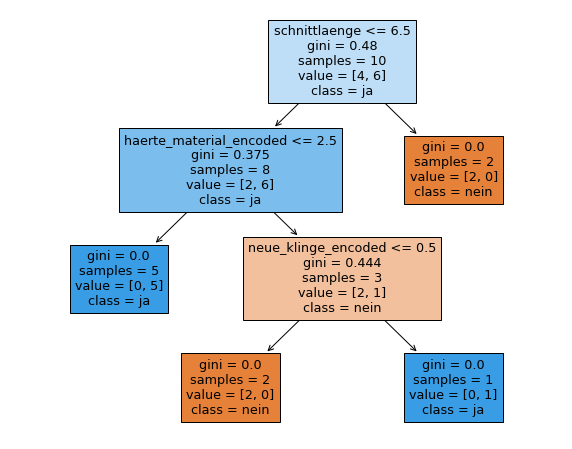

In [ ]:
# Grafische Ausgabe des Modells
from sklearn.tree import plot_tree

# Plot des Entscheidungsbaum 
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, 
          feature_names=X_train.columns, 
          class_names=['nein', 'ja'])
plt.show()

### 5.1.c Modell visualisieren - Erklärung

Das ist die **Bedeutung der Einträge in den Knoten des Baumes**: 

* Merkmal, das für die Entscheidungsregel in diesem Knoten verwendet wird (z.B Schnittlänge >= 6.5)
* "gini" bezieht sich auf die "Unreinheit" des Knotens, die ein Maß dafür ist, wie gut der Knoten die verschiedenen Klassen in den Daten trennt. Ein niedriger Gini-Wert weist auf einen reineren Knoten hin, der mehr von derselben Klasse enthält, während ein höherer Gini-Wert auf einen gemischteren Knoten mit mehr als einer Klasse hinweist.
  * gini = 0.0 <- homogener Knoten
  * gini = 0.5 <- maximal gemixter/unreiner Knoten (bei 2 Klassen)
  * wir wollen möglichts reine, homogene Knoten erreichen, also gini = 0.0
* "samples" bezieht sich auf die Anzahl der Trainingsbeispiele, die diesen bestimmten Knoten im Entscheidungsbaum erreichen.
* "value" bezieht sich auf die Anzahl der Trainingsbeispiele, die zu jeder Klasse an diesem bestimmten Knoten gehören. Beispielsweise würde "Wert=[4, 6]" bedeuten, dass es 4 Beispiele der Klasse 'nein' und 6 Beispiele der Klasse 'ja' gibt, die diesen Knoten im Entscheidungsbaum erreichen.
* "class" eines Knotens gibt die vorhergesagte Klassenbezeichnung für die Datenpunkte an, die diesen Knoten erreichen.
  * Wenn ein Knoten mit "class=ja" beschriftet ist, bedeutet dies, dass die Mehrheit der Trainingsbeispiele, die diesen Knoten erreichen, zur Klasse "ja" gehören. Mit anderen Worten: Die durch diesen Knoten repräsentierte Entscheidungsregel wird wahrscheinlich ein positives Ergebnis für neue, ungesehene Beispiele vorhersagen, die diese Regel erfüllen.

**Optionale, fortgeschrittene Bonus-Information**: 
Der maximal mögliche Gini-Wert hängt von der Anzahl der Klassen im Datensatz ab.

Bei einem binären Klassifizierungsproblem (d. h. zwei Klassen) liegt der maximale Gini-Wert bei 0,5. Dies ist der Fall, wenn die positiven und negativen Klassen gleichmäßig auf die Trainingsbeispiele verteilt sind.

Bei einem Klassifikationsproblem mit mehreren Klassen (d. h. mehr als zwei Klassen) hängt der maximale Gini-Wert von der Anzahl der Klassen und ihrer Verteilung im Datensatz ab. Im ungünstigsten Fall sind alle Klassen gleich verteilt. In diesem Fall beträgt der maximale Gini-Wert 1 - (1/n), wobei n die Anzahl der Klassen ist. Bei einem Drei-Klassen-Problem wäre der maximale Gini-Wert zum Beispiel 1 - (1/3) = 0,67.

### 5.2 Kreuzvalidierung des Modells

Am unteren Ende unseres Entscheidungsbaums sind alle Knoten rein, was bedeutet, dass jedes Blatt nur eine Klasse von Daten enthält, so dass das Modell gut zu funktionieren scheint. Um jedoch mehr Gewissheit über die Leistung des Modells zu erhalten, können wir eine Kreuzvalidierung durchführen. Die Kreuzvalidierung ist eine Technik, die beim maschinellen Lernen verwendet wird, um zu beurteilen, wie gut ein Modell auf neue Daten verallgemeinert werden kann. Dabei wird der Datensatz in mehrere Teile, so genannte "Foldings" (Falten), aufgeteilt und das Modell auf verschiedenen Kombinationen dieser Foldings trainiert und getestet. Auf diese Weise erhalten wir eine genauere Schätzung der Leistung des Modells bei ungesehenen Daten.

In diesem speziellen Fall werden wir die 5-fache Kreuzvalidierung verwendet, d. h. der Datensatz wird in fünf Teile aufgeteilt, und das Modell wird fünfmal trainiert und getestet, wobei jedes Mal eine andere Falte zum Testen verwendet wurde. Die Ergebnisse der Kreuzvalidierung zeigen uns, wie gut das Modell auf neue Daten verallgemeinert werden kann.

### 5.2.a Kreuzvalidierung des Modells - Übung

1. Importiere die Funktion `cross_val_score` aus dem Modul `model_selection `der Bibliothek *scikit-learn* mit der Anweisung import: `from sklearn.model_selection import cross_val_score`.

2. Erstelle eine Variable namens `scores` und weise ihr das Ergebnis des Aufrufs der Funktion `cross_val_score` mit den folgenden Argumenten zu:
  * model (unser Entscheidungsbaum-Modell, das wir evaluieren wollen)
  * X_train: die Eingabe-Features des Trainingssatzes.
  * y_train: die Zielwerte des Trainingssatzes.
  * cv: die Anzahl der *Faltungen* für die Kreuzvalidierung, setze sie auf `5`
3. Gib die Ergebnisse der Kreuzvalidierung mithilfe der Funktion `print()` und der Variablen `scores` aus.
4. Berechne und gib das durchschnittle Ergebniss der Kreuzvalidierung mit der Methode` mean() `der Variablen `scores`.

In [ ]:
#1. Importiere benötigte Funktion
# DEIN CODE HIER

# 2. Durchführung einer 5-fachen Kreuzvalidierung des Modells mit X_train und y_train
scores = # DEIN CODE HIER

# 3. die Ergebnisse der Kreuzvalidierung ausgeben
# DEIN CODE HIER

# 4. das durchschnittliche Ergebnis der Kreuzvalidierung ausgeben
print("Durchschnittliches Kreuzvalidierungsergebnis:", scores.mean())

### 5.2.b Kreuzvalidierung des Modells - Lösung

In [ ]:
#1. Importiere benötigte Funktion
from sklearn.model_selection import cross_val_score

# 2. Durchführung einer 5-fachen Kreuzvalidierung des Modells mit X_train und y_train
scores = cross_val_score(model, X_train, y_train, cv=5)

# 3. die Ergebnisse der Kreuzvalidierung ausgeben
print("Ergebnisse der Kreuzvalidierung:", scores)
# 4. das durchschnittliche Ergebnis der Kreuzvalidierung ausgeben
print("Durchschnittliches Kreuzvalidierungsergebnis:", scores.mean())

Ergebnisse der Kreuzvalidierung: [1.  1.  1.  0.5 1. ]
Durchschnittliches Kreuzvalidierungsergebnis: 0.9


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


### 5.2.c Kreuzvalidierung des Modells - Diskussion

Für die Kreuzvalidierung erhalten wir die Werte [1. 1. 1. 0.5 1.], was bedeutet, dass das Modell eine Genauigkeit von 100% (oder 1.0) für die ersten drei Faltungen, 50% (oder 0.5) für die vierte Faltung und 100% für die fünfte Faltung erreicht.

Der durchschnittliche Kreuzvalidierungswert, der aus dem Mittelwert der Werte berechnet wird, beträgt 0,9. Das bedeutet, dass das Modell während der Kreuzvalidierung im Durchschnitt eine Genauigkeit von 90 % erreicht hat und sich sehr wahrscheinlich auch gut für bisher ungesehene Daten gut nutzen lässt. 

## 6. Modell testen
Es ist wichtig, ein Modell für maschinelles Lernen nach seiner Validierung zu testen, um sicherzustellen, dass es auch bei neuen, unbekannten Daten gute Leistungen erbringen kann. So wie wenn wir für eine Prüfung lernen, sollten wir mit verschiedenen Arten von Fragen und Problemen üben, nicht nur mit denen, die wir schon einmal gesehen haben. Genauso muss ein Modell für maschinelles Lernen mit neuen Daten getestet werden, um sicherzustellen, dass es weiterhin genaue Vorhersagen machen kann.

Das Testen eines Modells ist wie eine Abschlussprüfung für das Modell. Wir verwenden einen separaten Datensatz, den das Modell noch nie gesehen hat, um seine Genauigkeit zu testen. Wenn das Modell bei diesem Test gut abschneidet, können wir davon ausgehen, dass es auch in der realen Welt gut funktioniert. Wenn es nicht gut abschneidet, müssen wir das Modell eventuell noch einmal ändern oder weitere Daten zum Trainieren des Modells beschaffen.

### 6.1.a Vorhersagen für die Testdaten - Übung

Mit dem folgendem Code wollen wir uns anschauen, welche Vorhersagen unser Modell macht bei drei bisher ungesehenen Daten. Der Code gibt die Vorhersage des Entscheidungsbaumes aus - wird die Schneidemaschine erfolgreich schneiden (=1) oder die Klinge kaputt gehen (=0).

In [ ]:
#Ergänze die fehlenden Code-Stellen

# Vorhersage 1
# schnittlaenge 2, Neues Werkzeug 'Nein' und Härte Material 'weich'
vorhersage1 = model.predict(X_test1)
print('Vorhersage für Schnittlänge = 2, Neues Werkzeug = Nein, und Materialhärte = weich: \t' + str(vorhersage1[0]))
print('Tatsächliche Klasse (erfolg_schnitt_encoded): ', y_test1['erfolg_schnitt_encoded'].iloc[0])

# Vorhersage 2
# schnittlaenge 4, Neues Werkzeug 'Ja' und Härte Material 'mittel'
vorhersage2 = model.predict(X_test2)
print('Vorhersage für Schnittlänge = 4, Neues Werkzeug = Ja, und Materialhärte = hart: \t\t' + str(vorhersage2[0]))
print('Tatsächliche Klasse (erfolg_schnitt_encoded): ', y_test2['erfolg_schnitt_encoded'].iloc[0])

# Vorhersage 3
# schnittlaenge 6, Neues Werkzeug 'Nein' und Härte Material 'hart'
vorhersage3 = # DEIN CODE HIER
print('Vorhersage für Schnittlänge = 5, Neues Werkzeug = Nein, und Materialhärte = mittel: \t' + # DEIN CODE HIER
print('Tatsächliche Klasse (erfolg_schnitt_encoded): ', # DEIN CODE HIER

*Hinweis:* Der Codeausschnitt` y_test1['erfolg_schnitt_encoded'].iloc[0] `greift auf die Tabelle` y_test1` zu, nämlich auf die Spalte namens `erfolg_schnitt_encoded` hat. Die Methode` iloc[0]` wird verwendet, um den ersten Wert der Spalte zu erhalten, und dieser Wert wird zurückgegeben.

### 6.1.b Vorhersagen für die Testdaten - Lösung

In [ ]:
#Vorhersagen mit .predict-Funktion
# Vorhersage 1
# schnittlaenge 2, Neues Werkzeug 'Nein' und Härte Material 'weich'
vorhersage1 = model.predict(X_test1)
print('Vorhersage für Schnittlänge = 2, Neues Werkzeug = Nein, und Materialhärte = weich: \t' + str(vorhersage1[0]))
print('Tatsächliche Klasse (erfolg_schnitt_encoded): ', y_test1['erfolg_schnitt_encoded'].iloc[0])

# Vorhersage 2
# schnittlaenge 4, Neues Werkzeug 'Ja' und Härte Material 'mittel'
vorhersage2 = model.predict(X_test2)
print('Vorhersage für Schnittlänge = 4, Neues Werkzeug = Ja, und Materialhärte = hart: \t\t' + str(vorhersage2[0]))
print('Tatsächliche Klasse (erfolg_schnitt_encoded): ', y_test2['erfolg_schnitt_encoded'].iloc[0])

# Vorhersage 3
# schnittlaenge 6, Neues Werkzeug 'Nein' und Härte Material 'hart'
vorhersage3 = model.predict(X_test3)
print('Vorhersage für Schnittlänge = 5, Neues Werkzeug = Nein, und Materialhärte = mittel: \t' + str(vorhersage3[0]))
print('Tatsächliche Klasse (erfolg_schnitt_encoded): ', y_test3['erfolg_schnitt_encoded'].iloc[0])

Vorhersage für Schnittlänge = 2, Neues Werkzeug = Nein, und Materialhärte = weich: 	1
Tatsächliche Klasse (erfolg_schnitt_encoded):  1
Vorhersage für Schnittlänge = 4, Neues Werkzeug = Ja, und Materialhärte = hart: 		1
Tatsächliche Klasse (erfolg_schnitt_encoded):  1
Vorhersage für Schnittlänge = 5, Neues Werkzeug = Nein, und Materialhärte = mittel: 	1
Tatsächliche Klasse (erfolg_schnitt_encoded):  1


### 6.2 Genauigkeit des Modells bestimmmen

Statt einzeln zu vergleichen, ob das Modell korrekt vorhersagen macht, können wir die Genauigkeit auch mit dem `accuracy_score` bestimmen lassen.

Wenn die bestimmte Genauigkeit hoch ist, bedeutet dies, dass das Modell bei den Testdaten gut abschneidet, was darauf schließen lässt, dass es auch bei neuen, ungesehenen Daten gut abschneidet. Ist die Genauigkeit hingegen niedrig, bedeutet dies, dass das Modell bei den Testdaten nicht gut abschneidet, was darauf hindeutet, dass es möglicherweise nicht gut auf neue Daten verallgemeinert werden kann.

In [ ]:
X_test = pd.concat([X_test1, X_test2, X_test3], ignore_index=True)
y_test = pd.concat([y_test1, y_test2, y_test3], ignore_index=True)

In dem Code oben sind` X_test1`,` X_test2` und `X_test3` DataFrames, die wir zuvor zum Test erstellt hatten. pd.concat() wird verwendet, um diese DataFrames zu einem DataFrame X_test zu kombinieren. Der Parameter ignore_index wird auf True gesetzt, um die ursprünglichen Indexwerte der DataFrames zu ignorieren und einen neuen sequenziellen Index für den kombinierten DataFrame zu erstellen.

Die DataFrames der Testdaten werden kombiniert um sie gleich mit der Funktion `accuracy_score()` verwenden zu können. Diese Funktion benötigt zwei Listen als Eingabe: die wahren Bezeichnungen und die vorhergesagten Bezeichnungen. Durch das Kombinieren der Test-DataFrames zu einem DataFrame und die Verwendung dieses kombinierten DataFrames mit der Funktion` accuracy_score()` kann die Genauigkeit der Modellvorhersagen für alle Testdaten berechnet werden, anstatt die Genauigkeit für jeden aufgeteilten DataFrame einzeln zu berechnen.

### 6.2.a Genauigkeit des Modells bestimmen - Übung

1. Zunächst verwende das trainierte Modell, um die Zielvariable y für die Testmenge X_test vorherzusagen. Die vorhergesagten Werte werden in y_pred gespeichert.` y_pred = model.predict(X_test)`  

2. Berechne die Genauigkeit der vorhergesagten Werte, indem sie mit den wahren Werten in y_test verglichen werden. Die berechnete Genauigkeit wird in der Variablen `accuracy` gespeichert. `accuracy = accuracy_score(y_test, y_pred)`
3. Zeige die berechnete Genauigkeit auf dem Bildschirm an.  `print("Genauigkeit:", accuracy)`

In [ ]:
# benötigte Funktion importieren
from sklearn.metrics import accuracy_score

#1. Vorhersagen treffen für das Test-Datensatz mittels unseres Entscheidungsbaumes
# DEIN CODE HIER

# 2.Genauigkeit unseres Baumes ermitteln 
# DEIN CODE HIER

#3. Genauigkeit ausgeben
# DEIN CODE HIER

### 6.2.b Genauigkeit des Modells bestimmen - Lösung

In [ ]:
from sklearn.metrics import accuracy_score

#1. Vorhersagen treffen für das Test-Datensatz mittels unseres Entscheidungsbaumes
y_pred = model.predict(X_test)

# 2.Genauigkeit unseres Baumes ermitteln 
accuracy = accuracy_score(y_test, y_pred)

#3. Genauigkeit ausgeben
print("Genauigkeit:", accuracy)

Genauigkeit: 1.0


### 6.2.c Genauigkeit des Modells bestimmen - Erklärung

Eine Genauigkeit von 1.0 bedeutet, dass 100% aller Daten aus dem Testdsatz korrekt vorhergesagt wurden. Das Modell hat den Test bestens bestanden und wird wahrscheinlich auch mit neuen Daten sehr zuverlässliche Vorhersagen machen.

## 7. Abschluss

Herzlichen Glückwunsch! 🎉 Du hast das Jupyter-Notebook erfolgreich abgeschlossen und alle Schritte durchlaufen, um vorherzusagen, ob eine Schneidemaschine während des Schneidevorgangs wahrscheinlich kaputt geht. Du hast die Daten eingelesen und erkundet, um sicherzustellen, dass sie bereit sind, von dem Entscheidungsbaum verarbeitet zu werden. Anschließend hast du das Entscheidungsbaum-Modell gebildet, validiert und getestet, um die Vorhersagegenauigkeit zu ermitteln. Durch diese Arbeit hast du die Grundlage gelegt, um vorbeugende Wartungsarbeiten an der Maschine durchzuführen und dadurch die Gesamteffizienz der Anlage zu verbessern und Ausfallzeiten zu reduzieren. Gute Arbeit! 😁

## 8. Ausblick

Du hast erfolgreich einen Entscheidungsbaum programmiert! Damit hasgt Du wertvolle Erfahrung gesammelt, die dir in Zukunft bei der Lösung ähnlicher Probleme helfen wird. Es gibt noch viele weitere Anwendungsfälle für Entscheidungsbäume, die du erkunden kannst. Wenn du möchtest, kannst du dich in Zukunft an diesen Herausforderungen versuchen und dein Wissen und Können weiter ausbauen.

* Qualitätskontrolle in der Fertigung: Ein Entscheidungsbaum könnte trainiert werden, um Produkte auf der Grundlage einer Reihe von Merkmalen wie Abmessungen, Gewicht und Materialzusammensetzung als akzeptabel oder fehlerhaft zu klassifizieren.

* **Kundensegmentierung**: Mit Hilfe eines Entscheidungsbaums können Kunden auf der Grundlage ihres Kaufverhaltens, ihrer demografischen Daten und anderer Merkmale segmentiert werden. Diese Informationen können für maßgeschneiderte Marketingkampagnen und zur Verbesserung der Kundenbindung genutzt werden.

* **Kreditwürdigkeitsprüfung**: Ein Entscheidungsbaum könnte verwendet werden, um Kreditanträge auf der Grundlage von Faktoren wie Kreditwürdigkeit, Einkommen und Beschäftigungsgeschichte entweder als risikoreich oder als risikoarm einzustufen.

* **Erkennung von Betrug**: Ein Entscheidungsbaum könnte verwendet werden, um betrügerische Transaktionen auf der Grundlage von Faktoren wie Transaktionsbetrag, Standort und Tageszeit zu erkennen.

* **Vorausschauende Wartung:** Ein Entscheidungsbaum könnte verwendet werden, um vorherzusagen, wann eine Maschine oder ein Gerät wahrscheinlich gewartet oder ausgetauscht werden muss, und zwar auf der Grundlage von Daten wie Nutzungsmuster, Alter und historische Wartungsaufzeichnungen.